This blog has been divided into 2 sections.

Section 1: (All theory) I have explained the problem caused by initializing the weights randomly and later, I have explained the need for a proper weight initialization technique and its type. Here, I have also shown (roughly) how can we implement the weight initialization technique in Keras.

Section 2: Here, I have implemented everything from scratch. Starting from initializing the weights randomly to initializing the weights following two famous techniques i.e., Xavier’s initialization technique, and He initialization technique.


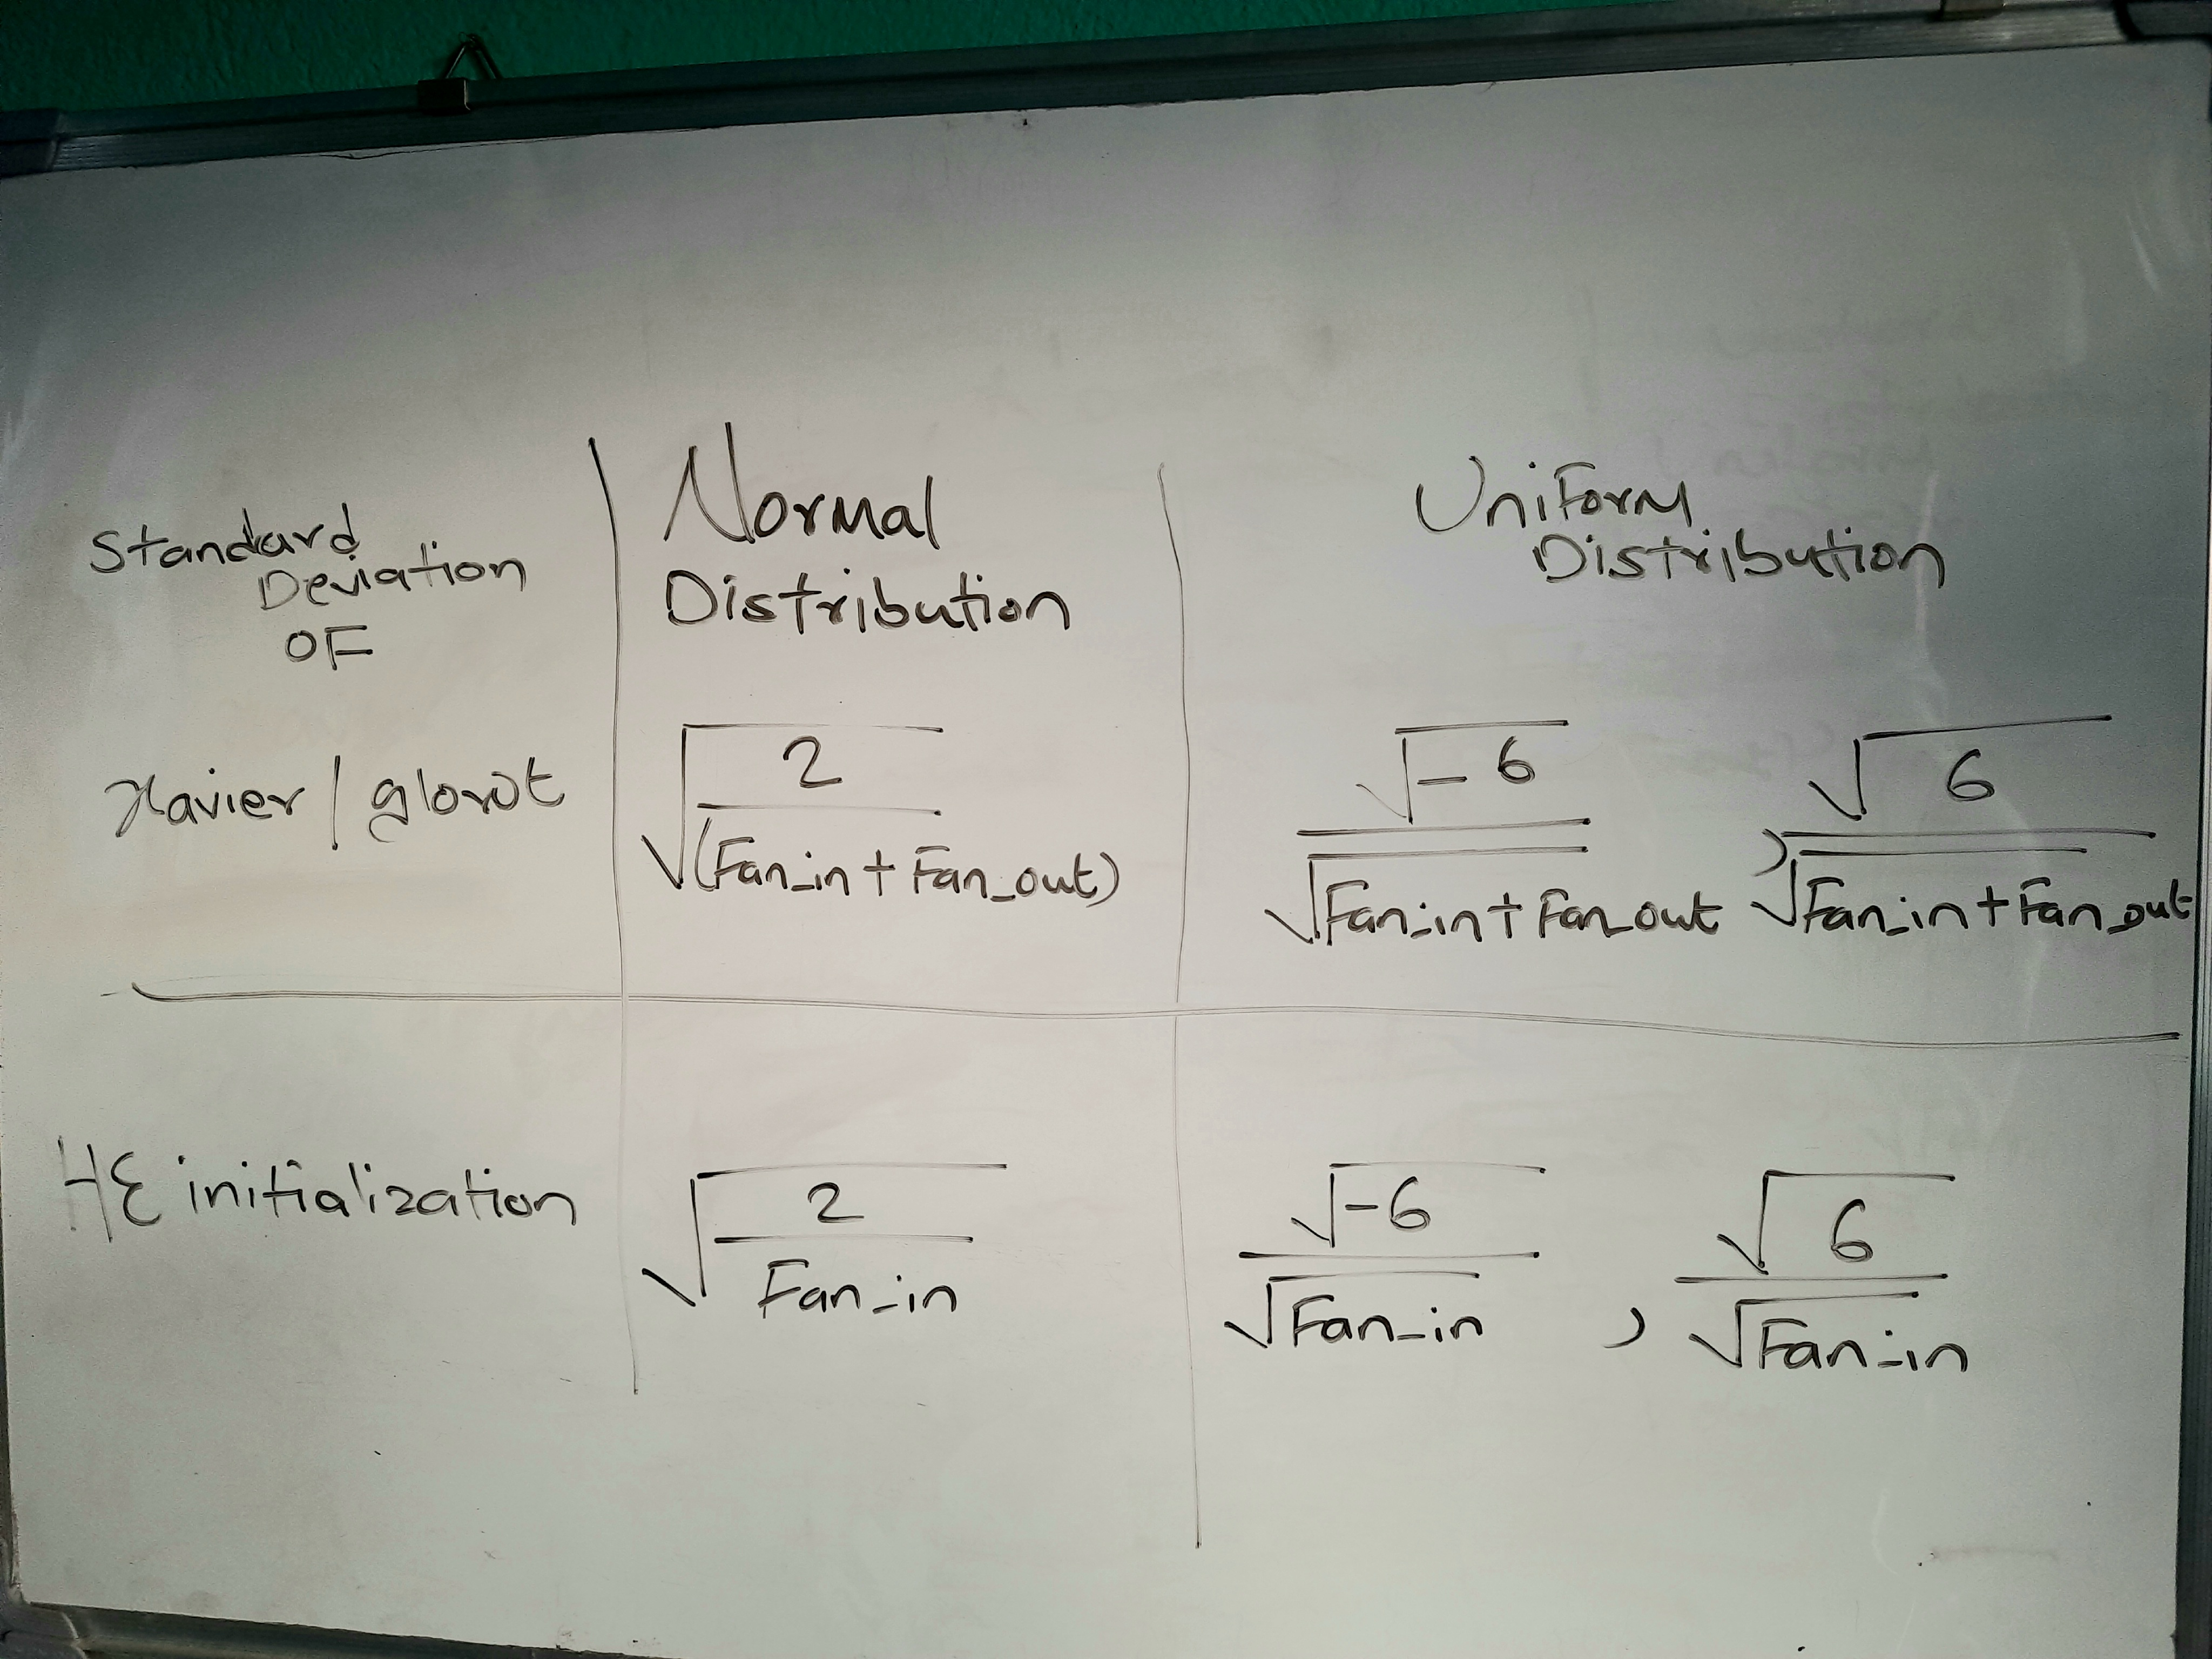

# Section 1

We all know W.T*X+b. Multiplying the input with the transpose of the weights and adding a bias. We see this in the linear, logistic regression, and neural networks.

Without W and b, our model cannot learn. We will have no point to start our forward propagation resulting in no loss/cost function, no backpropagation, nothing. We have been learning that w and b are something we must initialize randomly, and we will optimize them in multiple iterations after calculating the cost function and going through backpropagation. (p.s bias is initialized with 0 by default. )


So, the main question is how random that "randomly initializing" should be?
Things to consider while initializing the weights: It should not be zero or else input data will not contribute to getting output and, all the values of the weights should not be the same if not we will have a symmetry-breaking problem. Nodes that are connected side-by-side in a hidden layer connected to the same node must have different weights for the learning algorithms to update the weights.


Now, the only option is initializing with non-zero and distinct values that are normally distributed with mean 0 and standard deviation 1. What if, those randomly initialized weights are gigantic or tiny?

<b>Randomly initializing the weights without considering anything also has two possible issues:</br>

1: Vanishing gradient descent

   If all the weights are initialized with the tiny value (close to 0), while back propagating, the gradients of our former layers will get vanished because we are applying the chain rule which simply means multiplying all the value of the gradients starting from the output layer. Example: 0.1 x 0.1 x 0.1 x 0.1 = 0.0001. Hence, it will be difficult to find the optimum value of the weights and the training process will also get slower. 

2: Exploding gradient descent. 

   If all the weights are  initialized with the gigantic value (greater than 1), then the gradient will also grow exponentially casing the problem of Exploding Gradient. While backpropagating, the same chain rule will produce bigger values, example 1.5 x 1.6 x 1.3 x 1.5 = 4.68 causing the gradient overflow in our former layers resulting in becoming so gaint that it will be difficult to train on.
    

Both of these problem results in slowing down the training process because it will take longer time to get to the optimum value. 


In order to tackle these issues, researchers have come up with multiple approaches among them 2 most popular are (i) Xavier/Glorot initialization and (ii) He initialization.

Summarizing all the works of these two techniques in simple words: This initialization makes the variance of the weights lesser than 1 i.e., 1/n for Xavier and 2/n for He initialization, where n stands for the number of input weights and keeps the weights around 1 (neither too small nor too big) which will help to minimize the above-mentioned issues.


<b>When to use which?</b>Answer: If we are using the Relu activation function in our hidden layers, it is preferred to use He initialization developed by Kaiming He and if the activation function is sigmoid/tanh then we will get the best result from Xavier/glorot initialization developed by Xavier Glorot. 

We are lucky that these weight initializing techniques are already implemented in Keras. The only work you have to do is follow below shown steps. We can set these in our Keras sequential model’s dense layers adding the parameters kernel_initializer. And last, we have two types of each weight initialization technique implemented following the normal distribution and the uniform distribution.


To implement xavier/glorot’s weight initialization that follows normal distribution use kernel_initializer = ‘glorot_normal’ and for uniform distribution, use kernel_initializer = ‘glorot_uniform’


To implement He weight initialization that follows normal distribution use kernel_initializer = ‘he_normal’ and for uniform distribution, use kernel_initializer = ‘he_uniform’


By default, the weight initializer is glorot_uniform for the neural network. In the image, I have shown what changes both initialization techniques do in standard deviation to initialize the weights. In the denominator, I have used the notation fan_in and fan_out. Fan_in means the total number of nodes of the previous layer and fan_out means the number of nodes in a current layer.

# Section 2

In [1]:
import numpy as np

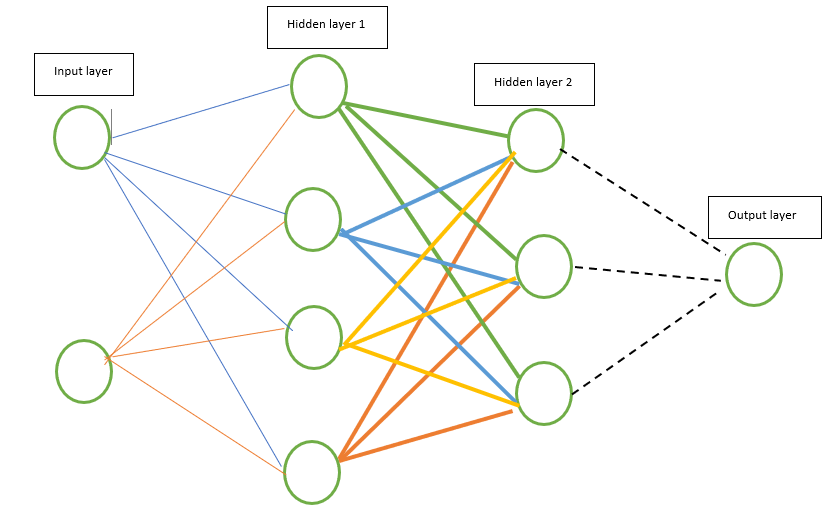

If we initialize the weights of the above neural network architecture, it would be:

hidden layer 1 would have the weight matrix of dimension (4,2),

hidden layer 2 would have the weight matrix of dimension (3,4),

And the output layer would have the weight dimension (1,3)

In [2]:
#Scratch code implementation of random weight inilialization without any weight initialization technique.
def weight_initializer(l):
    #l = number of layers and number of neurons in each layer
    parameters  = {}
    for i in range(1,len(l)):
        parameters["W"+str(i)] = np.random.randn(l[i],l[i-1])
        parameters["b"+str(i)] = np.zeros((l[i],1))
    return parameters

In [3]:
for i,j in weight_initializer([2,4,3,1]).items():
    print(f'{i} = {j}')
    print(f'Shape of {i} is {j.shape},\n')

W1 = [[ 1.49762865  0.68411184]
 [-1.91015858 -0.19759831]
 [-0.82095984  0.0653622 ]
 [ 1.74349923 -0.23801974]]
Shape of W1 is (4, 2),

b1 = [[0.]
 [0.]
 [0.]
 [0.]]
Shape of b1 is (4, 1),

W2 = [[-1.8681939  -1.02443343 -0.23629411 -0.10477113]
 [-0.96349018  0.14893337  0.69125515  0.87206941]
 [-0.05343143  0.60217456 -0.33329301  0.38972247]]
Shape of W2 is (3, 4),

b2 = [[0.]
 [0.]
 [0.]]
Shape of b2 is (3, 1),

W3 = [[-1.83409867  0.67886618 -0.64194953]]
Shape of W3 is (1, 3),

b3 = [[0.]]
Shape of b3 is (1, 1),



We can always have bigger/deeper neural network than the above one. Something like below.

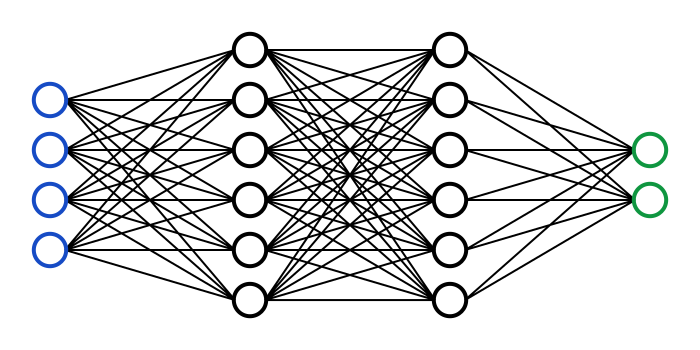

As explained above, if we have a deeper network, the gradient could get vanished or explode if initialized randomly. The solution is to follow the proper weight initializing techniques.

In [4]:
#Scratch code implementation of random weight inilialization with He initialization technique
#This is preferred if our activation funtion is Relu.
def weight_initializer_for_relu(l):
    #l = number of layers and number of neurons in each layer
    parameters  = {}
    for i in range(1,len(l)):
        parameters["W"+str(i)] = np.random.randn(l[i],l[i-1]) * np.sqrt(2/l[i-1])
        parameters["b"+str(i)] = np.zeros((l[i],1))

    return parameters

In [5]:
for i,j in weight_initializer_for_relu([2,4,3,1]).items():
    print(f'{i} = {j}')
    print(f'Shape of {i} is {j.shape},\n')

W1 = [[-0.18105733 -0.85617923]
 [-1.05805755  0.55208641]
 [ 0.04233877 -0.71644218]
 [ 1.27705931 -0.55343318]]
Shape of W1 is (4, 2),

b1 = [[0.]
 [0.]
 [0.]
 [0.]]
Shape of b1 is (4, 1),

W2 = [[ 0.41016565  0.75551256  0.33243146  0.1762645 ]
 [-0.09839764 -1.17207439  0.2014356  -0.01888558]
 [ 0.13935789  1.23005535  0.4647552   0.6321244 ]]
Shape of W2 is (3, 4),

b2 = [[0.]
 [0.]
 [0.]]
Shape of b2 is (3, 1),

W3 = [[-0.81249599 -1.35540352  0.47725066]]
Shape of W3 is (1, 3),

b3 = [[0.]]
Shape of b3 is (1, 1),



In [6]:
#Scratch code implementation of random weight inilialization with He initialization technique
def weight_initializer_for_sigmoid(l): #Xaview (Glorot) initialization tenchique
    #l = number of layers and number of neurons in each layer
    parameters  = {}
    for i in range(1,len(l)):
        parameters["W"+str(i)] = np.random.randn(l[i],l[i-1]) * np.sqrt(2/(l[i-1]+l[i]))
        parameters["b"+str(i)] = np.zeros((l[i],1))

    return parameters

In [7]:
for i,j in weight_initializer_for_sigmoid([2,4,3,1]).items():
    print(f'{i} = {j}')
    print(f'Shape of {i} is {j.shape},\n')

W1 = [[-0.55642605  0.05414634]
 [ 0.13501485 -0.59984156]
 [-0.3317484   0.37982677]
 [-0.9029417  -0.97597391]]
Shape of W1 is (4, 2),

b1 = [[0.]
 [0.]
 [0.]
 [0.]]
Shape of b1 is (4, 1),

W2 = [[-0.19312766  0.24402972 -0.63279027  0.45166843]
 [-0.61828049 -0.40452581  0.52158565 -0.04830385]
 [-0.12413994  0.27920588  0.65381228  0.13869143]]
Shape of W2 is (3, 4),

b2 = [[0.]
 [0.]
 [0.]]
Shape of b2 is (3, 1),

W3 = [[ 0.56402376 -0.17971457  0.27155112]]
Shape of W3 is (1, 3),

b3 = [[0.]]
Shape of b3 is (1, 1),



If we look at the values of W, it is around 1. But we need to know that, this does not solve the problem completely. It tries to maintain the weights close to 1 so that we will not have the vanishing or exploding gradient.